# Introduction

Welcome to the **notebook** version of Bank marketing campaigns analysis and predictions of a Portuguese banking institution, created by Zakaria El-Aoufi. 

In this notebook, we will explore **banking marketing campaigns**. The dataset captures information on whether clients subscribed to a term deposit. Through this analysis, I aim to uncover patterns and trends in subscription rates, providing a comprehensive understanding of the factors influencing customer decisions.

This notebook comprises two essential parts:

1. **Exploratory Data Analysis (EDA):** A detailed exploration of the dataset to uncover patterns and trends.
2. **Machine Learning Classification Model:** A predictive model to predict future subscription based on specific variables outlined below.

# Dataset Variables

Here are the key variables included in the dataset:

- **age:** Age of the client.  
- **job:** Occupation type of the client.  
- **marital:** Marital status of the client.  
- **education:** Education level of the client.  
- **default:** Whether the client has credit in default.  
- **balance:** Average yearly balance of the client (in euros).  
- **housing:** Whether the client has a housing loan.  
- **loan:** Whether the client has a personal loan.  
- **contact:** Communication type used to contact the client.  
- **day_of_week:** Last contact day of the week.  
- **month:** Last contact month of the year.  
- **duration:** Last contact duration in seconds.  
- **campaign:** Number of contacts performed during this campaign.  
- **pdays:** Days since the client was last contacted (if applicable).  
- **previous:** Number of contacts performed before this campaign.  
- **poutcome:** Outcome of the previous marketing campaign.  
- **subscription (Target):** Whether the client subscribed to a term deposit.  

# Goals

The primary objectives of this analysis are:

- To understand the behavior of subscription across demographic category and other features.
- To identify factors influencing subscription.
- To build a machine learning classification model for predicting future subscription.

Let's dive into the data analysis and modeling process.

# Setup Environment and Quick View of The Data 

In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [398]:
bank_df = pd.read_csv('./data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [399]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [400]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


# EDA

## Investigating Column shape and Distribution 

### Histograms for Numerical Columns

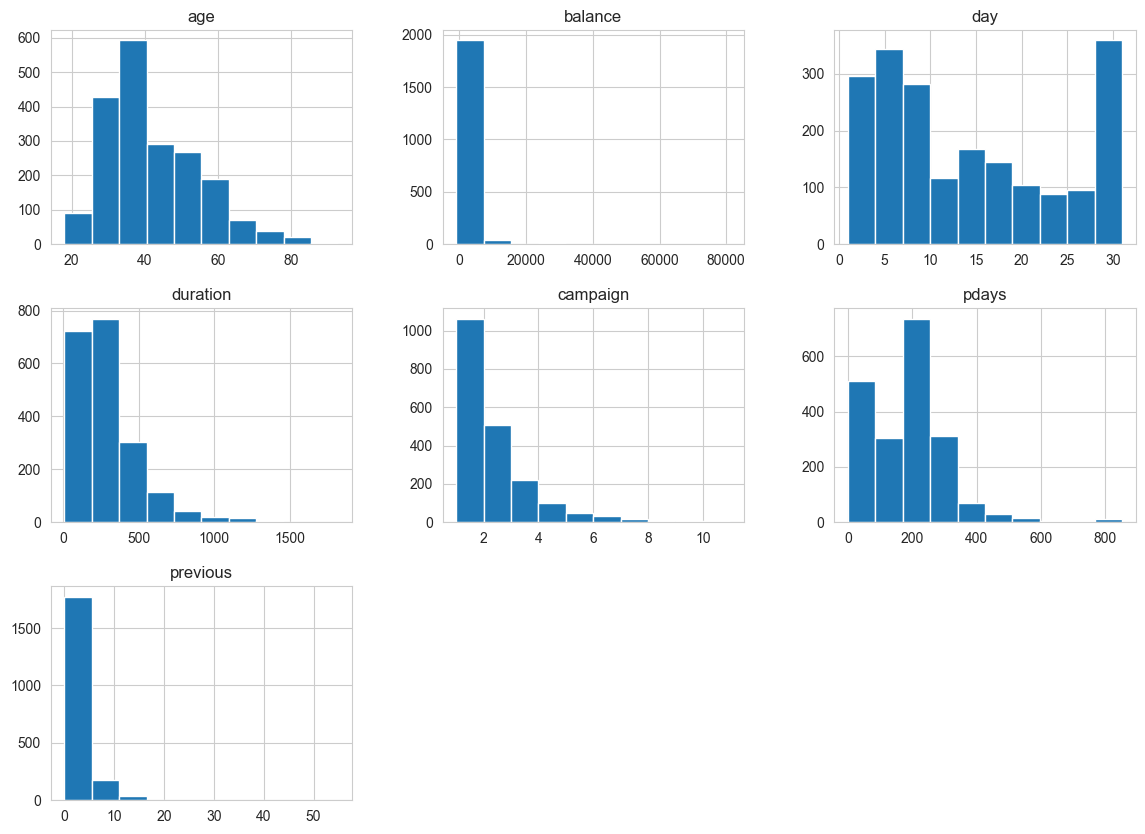

In [401]:
bank_df.hist(figsize=(14, 10))
plt.show()

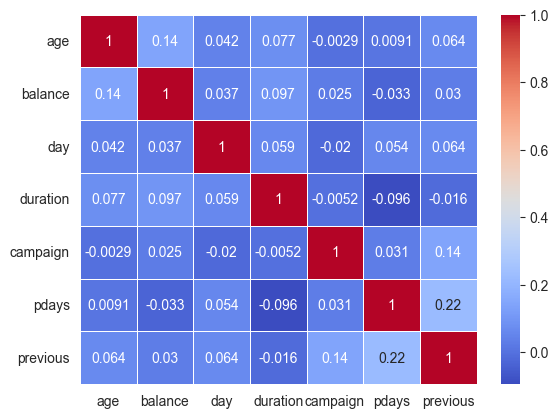

In [402]:
num_col = bank_df.select_dtypes(include=[np.number]).columns.tolist()
correlation = bank_df[num_col].corr()

sns.heatmap(correlation, cmap='coolwarm', annot=True, linewidth=.5)
plt.show()

# Demographic Segmentation
In high level **Demographic segmentation** is a marketing strategies employed by businesses to gain deeper insights into their target audience. This method involves dividing consumers into groups based on various factors like age, gender, income, education, and occupation, among others.

In this section we will dig deeper in the demographic characteristic features such as age, education level, income (balance in our case)...

![](./img/what-is-demographic-segmentation.png)

### Age Segmentation Function
During our analysis we will divide our population into different 5 categories 'Young Adults', 'Emerging Professionals ', 'Established Professionals', 'Pre-Retirement Phase', 'Retirees & Seniors'

In [403]:
# The following code will create the age segmentation column with appropriate labels
age_bins = [17, 25, 35, 50, 65, 100]
age_label = ['Young Adults', 'Emerging Professionals ', 'Established Professionals', 'Pre-Retirement Phase', 'Retirees & Seniors']
bank_df['age segmentation'] = pd.cut(bank_df['age'], bins=age_bins, labels=age_label)
bank_df['age segmentation'] = bank_df['age segmentation'].astype('object')

### Balance Segmentation
We will divide the population balance into different 5 categories 'Low Balance', 'Moderate Balance', 'Comfortable Savers ', 'Wealth Builders', 'High Net Worth'

In [404]:
age_bins = [-990, 200, 1000, 5000, 15000, 100000]
age_label = ['Low Balance', 'Moderate Balance', 'Comfortable Savers ', 'Wealth Builders', 'High Net Worth']
bank_df['balance segmentation'] = pd.cut(bank_df['balance'], bins=age_bins, labels=age_label)
bank_df['balance segmentation'] = bank_df['balance segmentation'].astype('object')

### Month to Season

In [405]:
# Define month-to-season mapping
season_mapping = {
    'dec': 'Winter', 'jan': 'Winter', 'feb': 'Winter',
    'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
    'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
    'sep': 'Fall', 'oct': 'Fall', 'nov': 'Fall'
}

# Create the 'season' column
bank_df['season'] = bank_df['month'].map(season_mapping)

In [406]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age segmentation,balance segmentation,season
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,Emerging Professionals,Moderate Balance,Spring
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,Established Professionals,Moderate Balance,Spring
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,Pre-Retirement Phase,Comfortable Savers,Spring
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,Established Professionals,Moderate Balance,Spring
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,Pre-Retirement Phase,Comfortable Savers,Spring


### Create a convenient function for generating stacked bar and pie plots

In [407]:
def subscribed_by_col_plot(data,col,rotation=0):
    # Perform grouping and aggregation
    data_col = data.groupby(col)['subscribed'].value_counts(normalize=True).reset_index()
    # Create a pivot table to help us perform the desired viz
    pivot_data = data_col.pivot(index=col, columns='subscribed', values='proportion').sort_values('yes',ascending=False)
    
    # stacked bar
    pivot_data.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.xlabel(col)
    plt.ylabel('probability')
    plt.title(f'Subscription by Demographic Category: {col}')
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

In [408]:
def demography_by_yes_subs_pie(data,col):
    # Grouping and calculating proportions
    data_col = (
        data.groupby(col)['subscribed']
        .value_counts(normalize=True)
        .reset_index(name='proportion')
    )
    
    # Filtering only "yes" responses
    data_col_yes = data_col[data_col['subscribed'] == 'yes']
    
    # Plotting the pie chart
    data_col_yes.set_index(col)['proportion'].plot(
        kind='pie', autopct='%1.1f%%', figsize=(7, 5)
    )
    
    plt.ylabel('')
    plt.title(f'Subscriptions Rate "Yes" by Demographic Category: {col}')
    plt.tight_layout()
    plt.show()

## Subscription Rate "Yes" by Demographic Category: Age

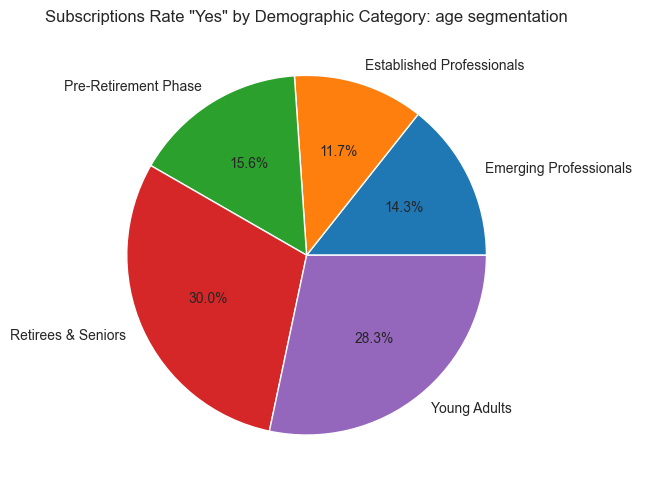

In [409]:
demography_by_yes_subs_pie(bank_df,'age segmentation')

**Insights from the Plot:**
The plot above indicates that Young Adults and Retirees have the highest subscription rates.

Potential Causes:
* **Young Adults:** Greater awareness and understanding of the benefits of subscriptions.
* **Retirees:** This may be due to financial security or health-related concerns.

## Detailed Subscription Rate Insights for Demographic Category: Age

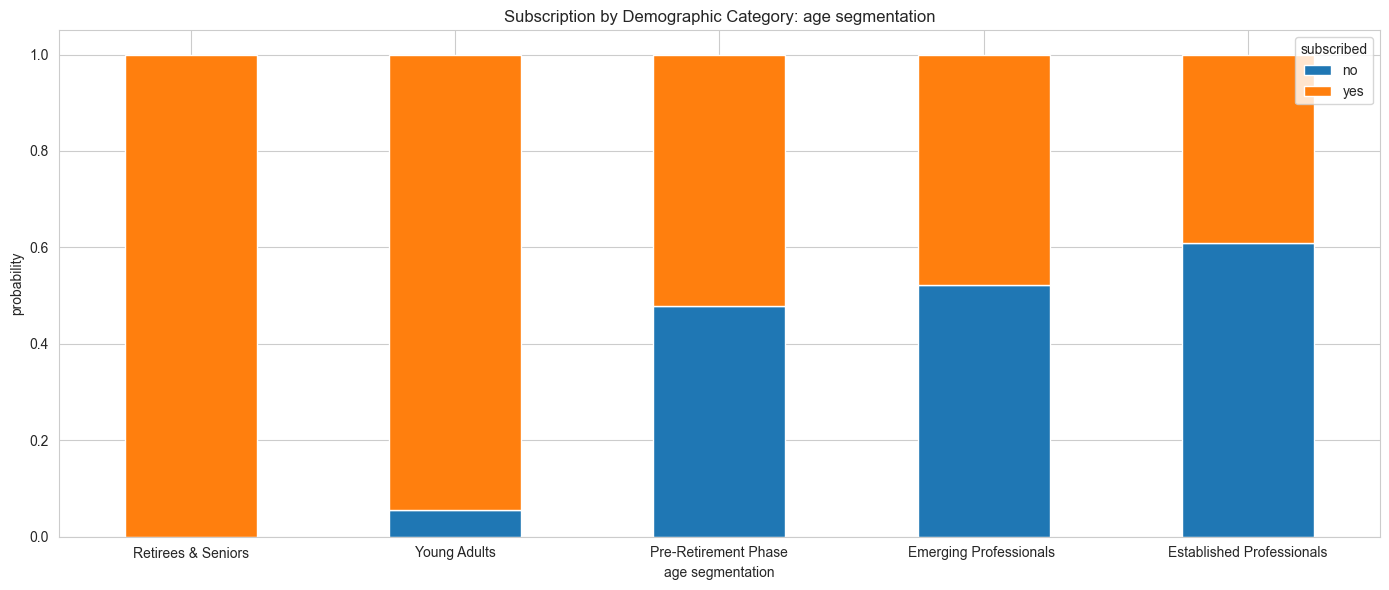

In [410]:
subscribed_by_col_plot(bank_df, 'age segmentation')

## Subscription Rate "Yes" by Demographic Category: Balance

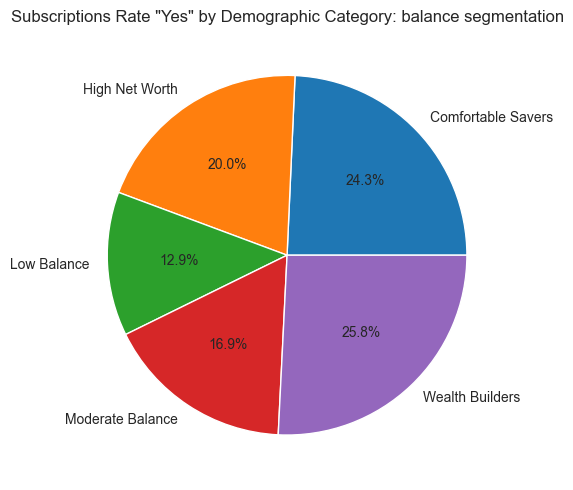

In [411]:
demography_by_yes_subs_pie(bank_df,'balance segmentation')

**Insights from the Plot:**
The plot above indicates that customers who are financially stable—"Comfortable Stable," "Wealth Builders," and "High Net Worth" have the highest subscription rates.

Potential Causes:
* Their financial stability provides sufficient liquidity to consider potential investments.
* They may not have as many financial obligations or emergencies to prioritize, allowing them to allocate resources toward subscriptions.

## Detailed Subscription Rate Insights for Demographic Category: Balance

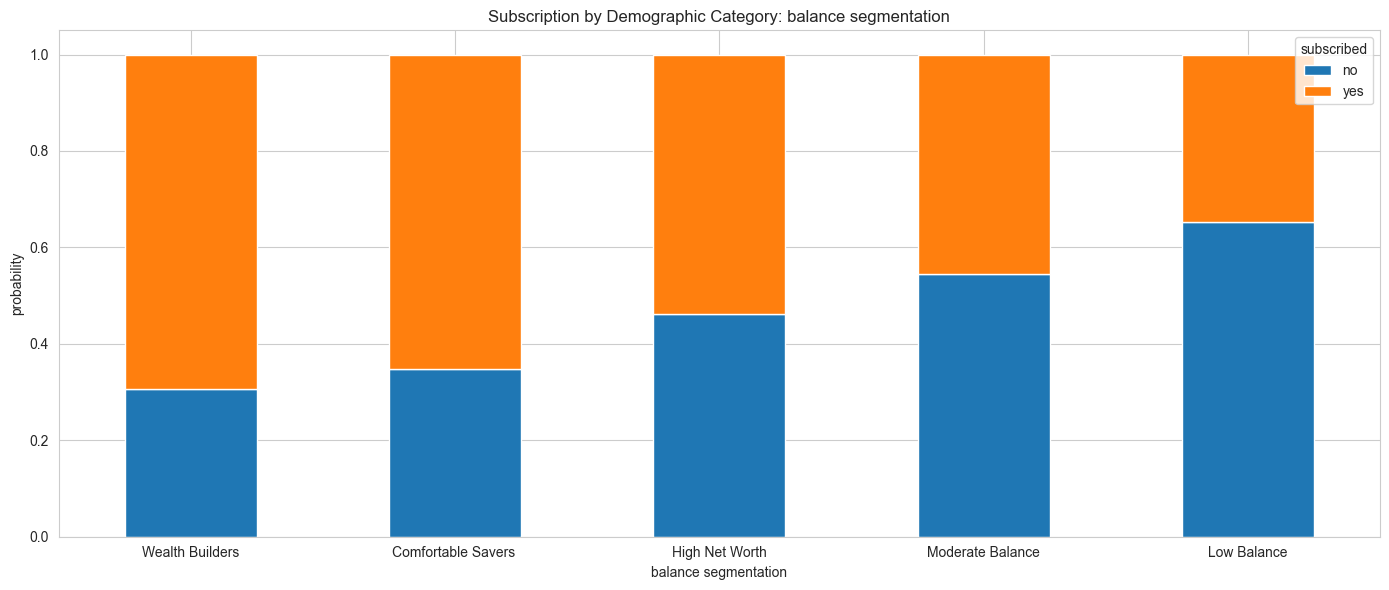

In [412]:
subscribed_by_col_plot(bank_df, 'balance segmentation')

## Subscription Rate by Demographic Category: Marital

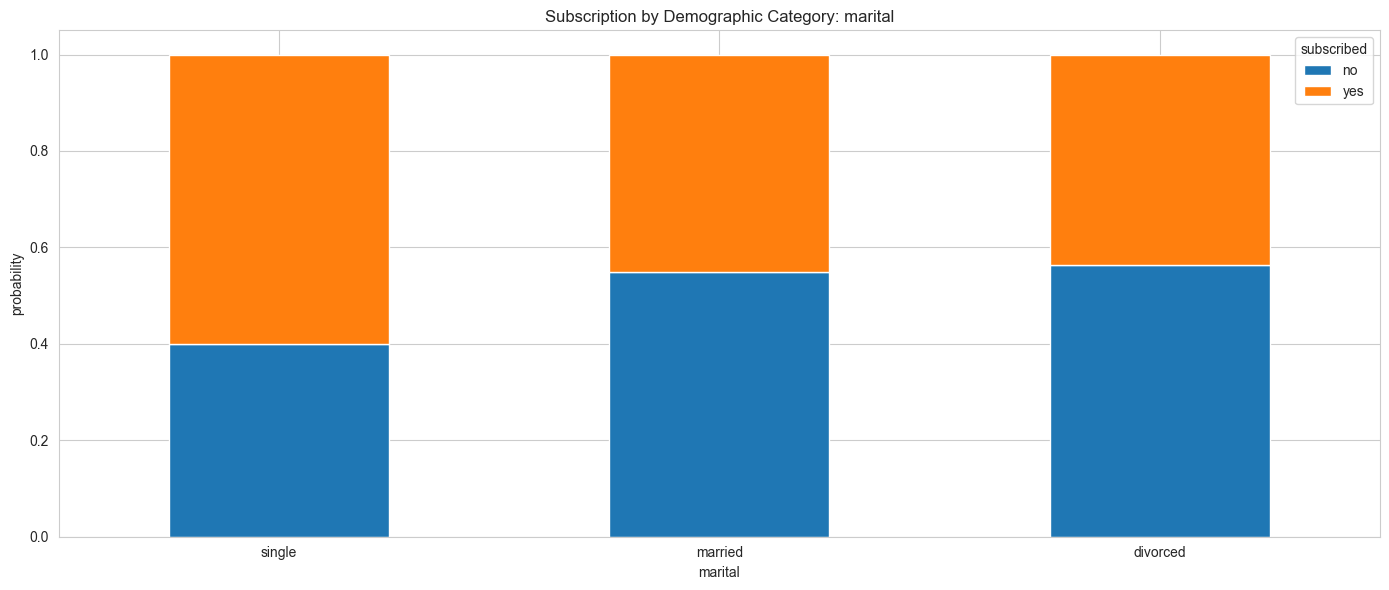

In [413]:
subscribed_by_col_plot(bank_df, 'marital')

## Subscription Rate by Demographic Categories: Balance and Marital

In [414]:
filtered_df = bank_df[bank_df['balance segmentation'].isin(['Wealth Builders', 'High Net Worth'])]
result = (
    filtered_df
    .groupby(['balance segmentation', 'marital'])['subscribed']
    .value_counts(normalize=True)
    .reset_index()
)

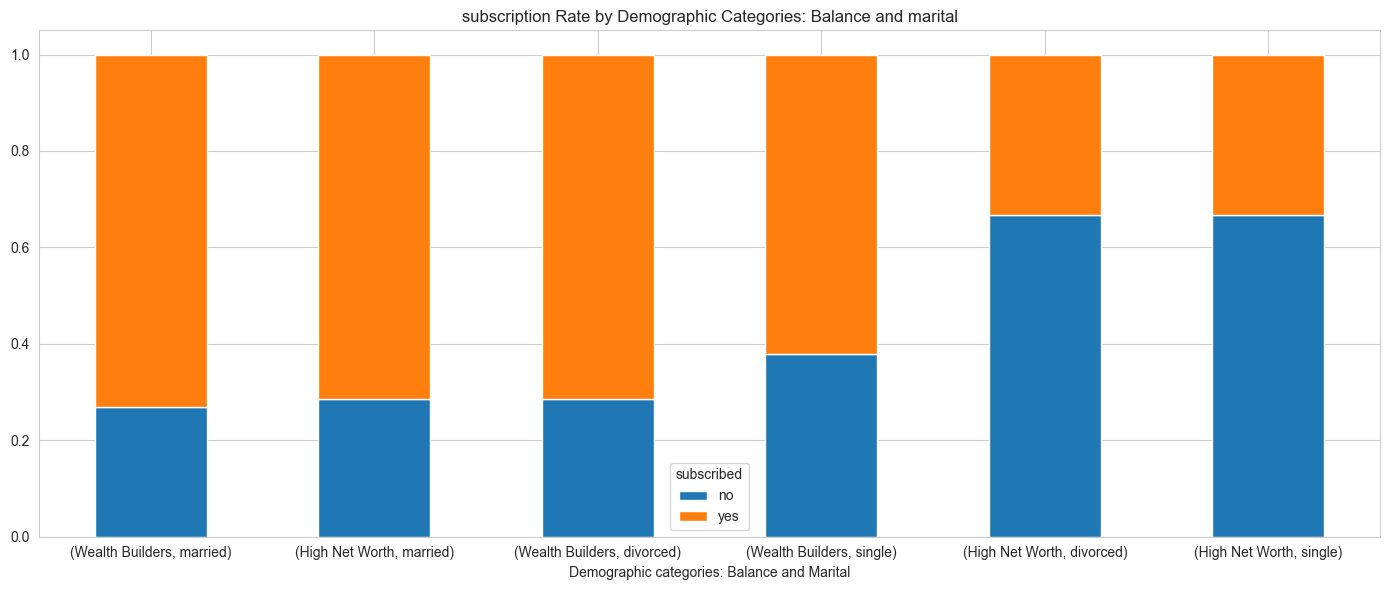

In [415]:
pivot_data = result.pivot(index=['balance segmentation', 'marital'], columns='subscribed', values='proportion').sort_values('yes',ascending=False)

pivot_data.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title(f'subscription Rate by Demographic Categories: Balance'
          f' and marital')
plt.xlabel('Demographic categories: Balance and Marital')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights from the Plot:**
The plot above indicates that individuals who are currently in or have previously been in a relationship are more likely to subscribe.

Potential Causes: 
* **Bank packages for married individuals:** These often offer more benefits compared to those for single individuals, such as joint accounts or shared financial goals making subscriptions more appealing.
* **Shared financial responsibilities:** Couples may pool resources, making it easier to afford subscriptions.
* **Lifestyle factors:** Individuals in relationships may prioritize services or products that enhance their shared experiences or household management.

## Subscription Rate by Demographic Category: Education

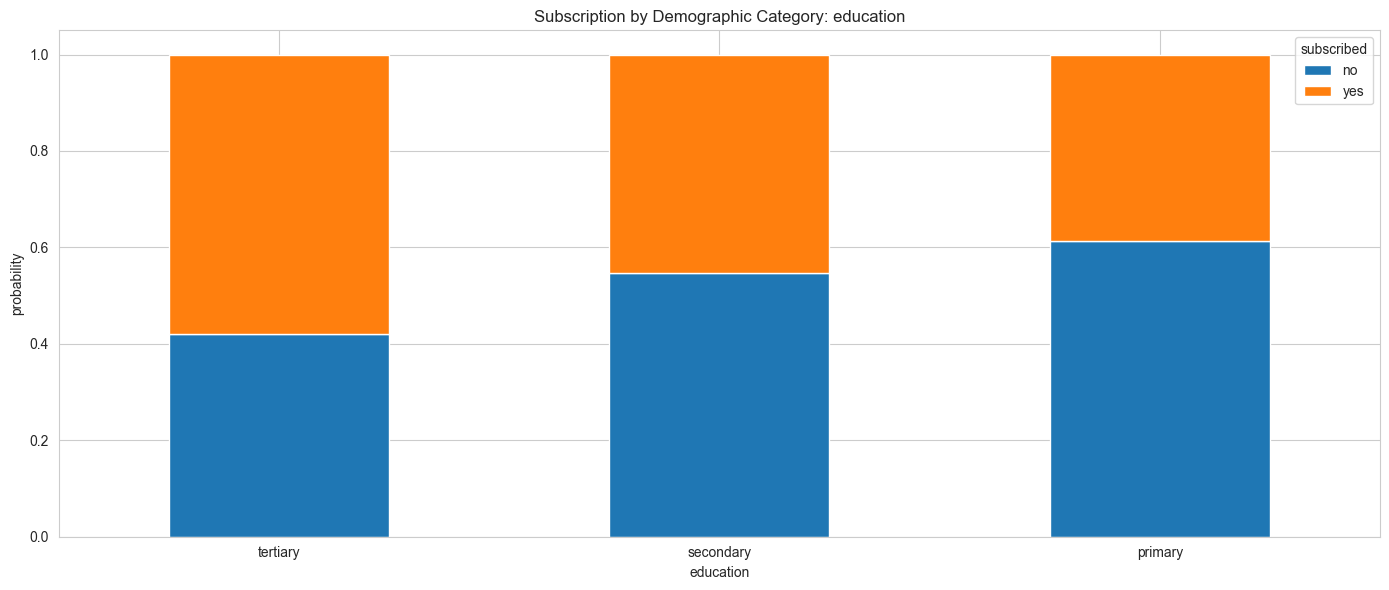

In [416]:
subscribed_by_col_plot(bank_df, 'education')

Insights from the Plot:
The plot above indicates that individuals with tertiary education (colleges and universities) are more likely to subscribe.

Potential Causes:

* Higher disposable income: Individuals with tertiary education often have better-paying jobs, providing them with more financial flexibility to invest in subscriptions.
* Awareness and access: Higher education may increase awareness of the benefits of such subscriptions.

## Subscription Rate by Housing Factor

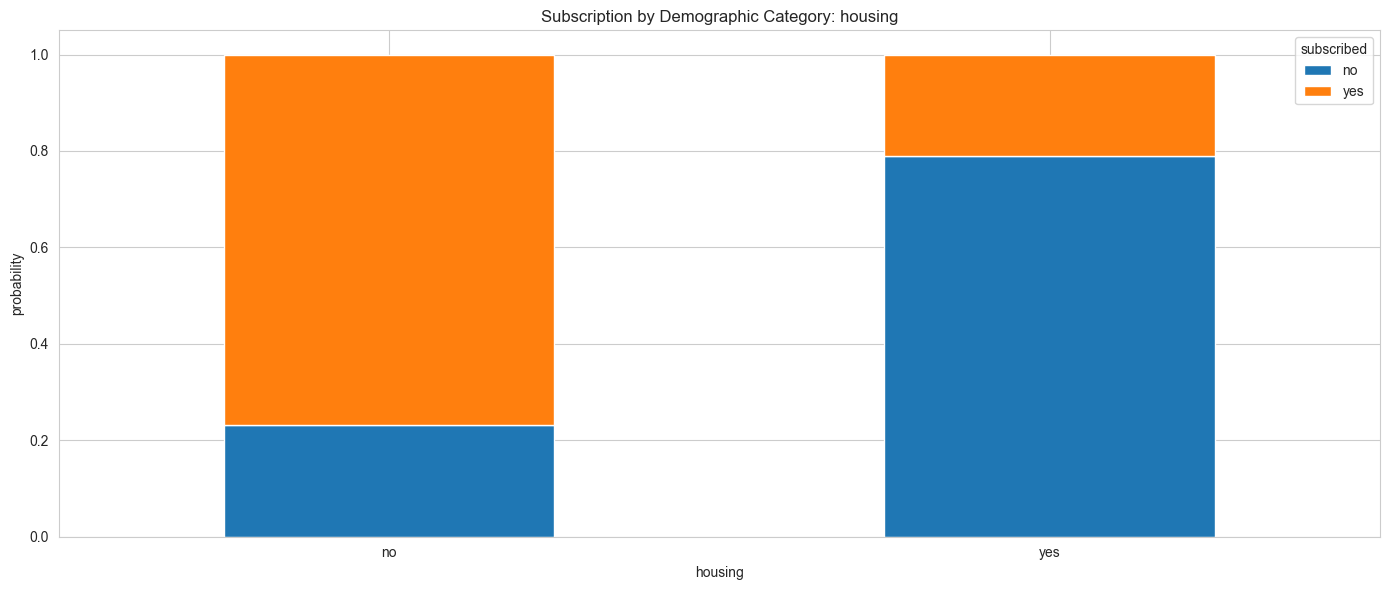

In [417]:
subscribed_by_col_plot(bank_df, 'housing')

**Insights from the Plot:**
The plot above indicates that individuals without a housing loan are more likely to subscribe.

**Potential Causes:**

* **Greater financial liquidity:** Individuals without housing loans likely have more disposable income, making it easier to afford subscriptions.
* **Fewer financial obligations:** Without the burden of a housing loan, they may have fewer monthly expenses, allowing them to allocate funds toward spending like subscriptions.

## Subscription Rate "Yes" by Job

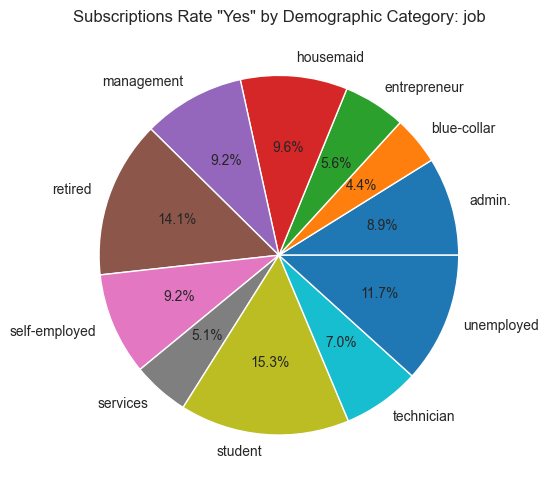

In [418]:
demography_by_yes_subs_pie(bank_df,'job')

## Subscription Rate by Job

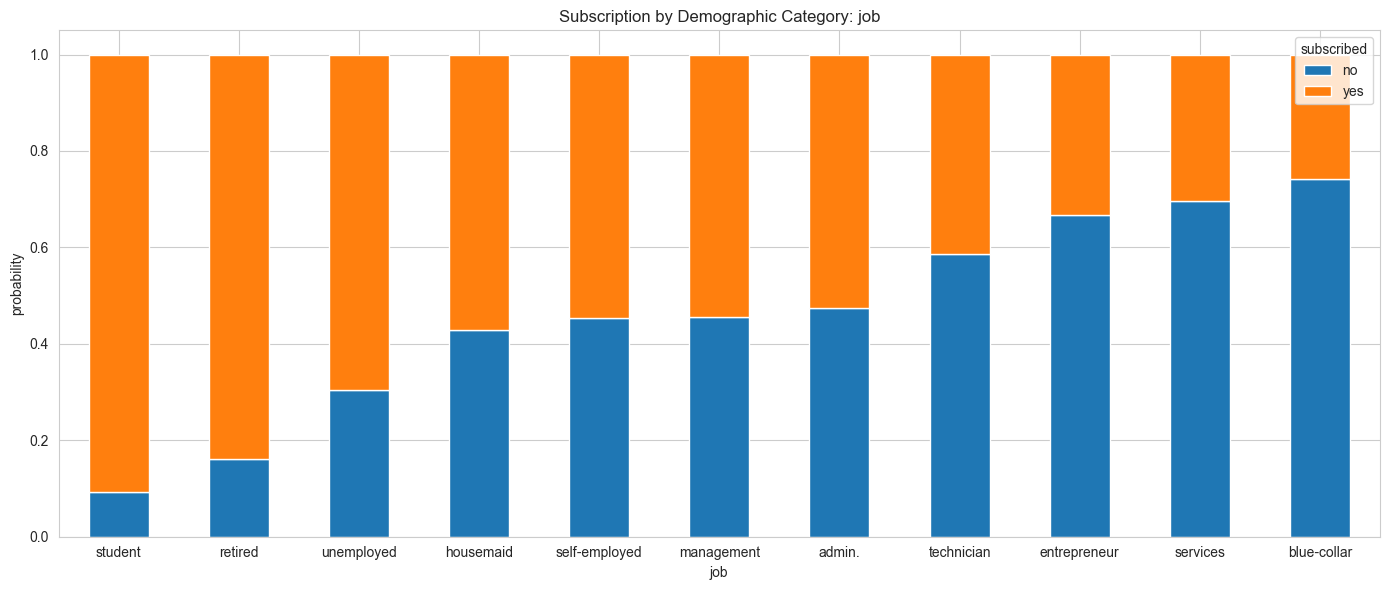

In [419]:
subscribed_by_col_plot(bank_df, 'job')

**Insights from the Plot:**
The plot above indicates that Students, Retirees, Unemployed, Housemaids, and Self-Employed individuals are more likely to subscribe.

**Potential Causes:**
* **Students:** Greater awareness of the benefits of subscriptions, such as access to educational resources, discounts...
* **Retirees:** This may be due to financial security or health-related concerns that necessitate certain subscriptions.
* **Unemployed:** The bank may offer attractive subscription packages tailored to this group, or they may be temporarily unemployed but still actively seeking opportunities.
* **Housemaids and Self-Employed:** The bank may provide subscriptions that address specific risks, such as health or financial security, which are particularly relevant to these groups.

## Subscription Rate by Month and Seasons

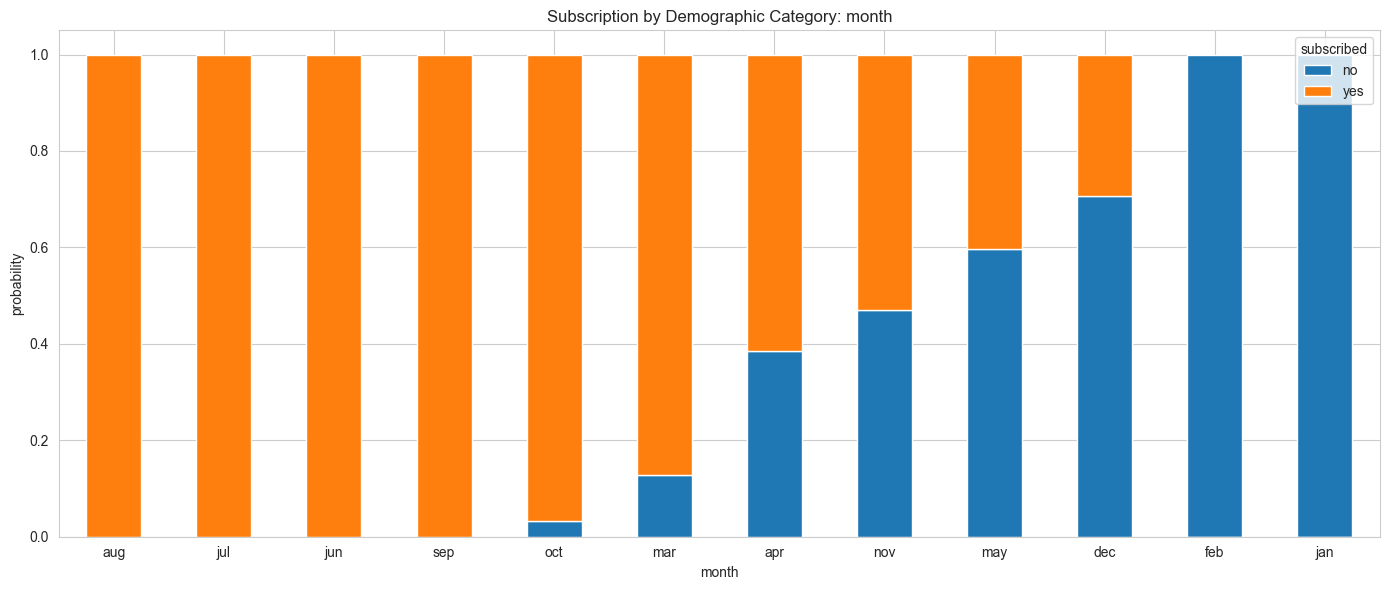

In [420]:
subscribed_by_col_plot(bank_df, 'month')

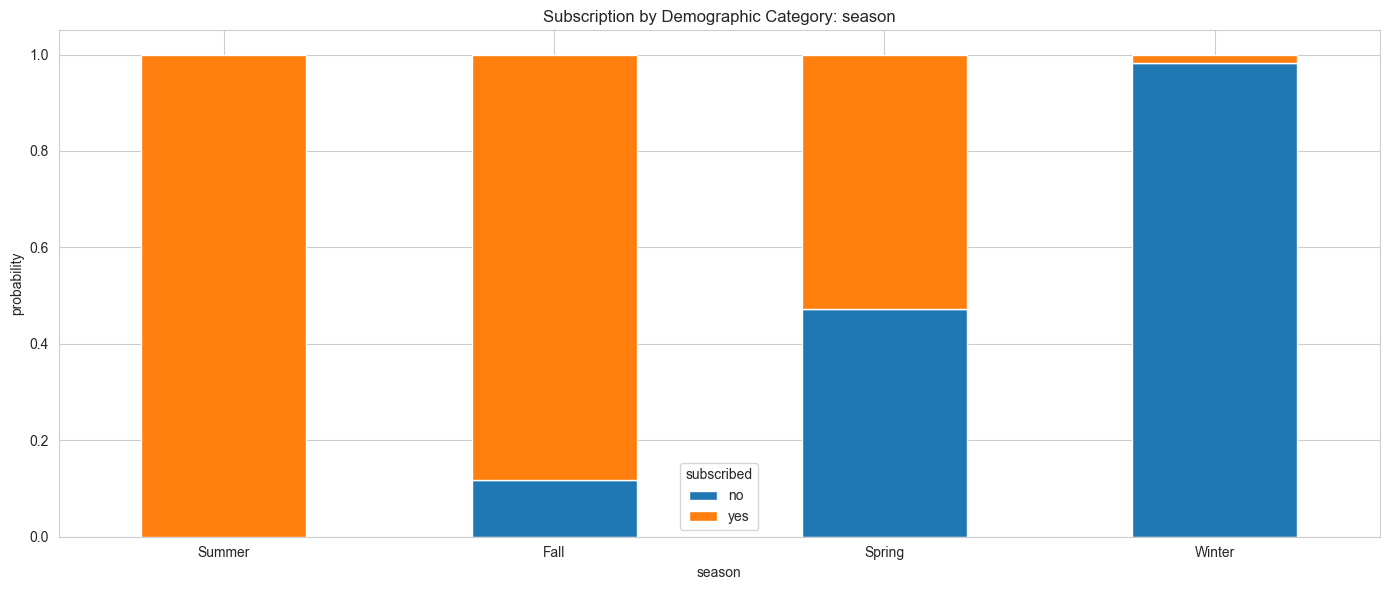

In [421]:
subscribed_by_col_plot(bank_df, 'season')

**Insights from the Plot:**
The plot above indicates that individuals are more likely to subscribe during summer and fall.

**Potential Causes:**
* **Positive Energy & Good Feelings:** During summer, individuals tend to be more energetic and optimistic, which may increase their willingness to accept offers from agents or invest in subscriptions.
* **Back-to-School:** Fall coincides with the beginning of the academic year, which may drive higher subscription rates for services tailored to educational needs or back-to-school preparations.

## Subscription Rate by Season and Marital

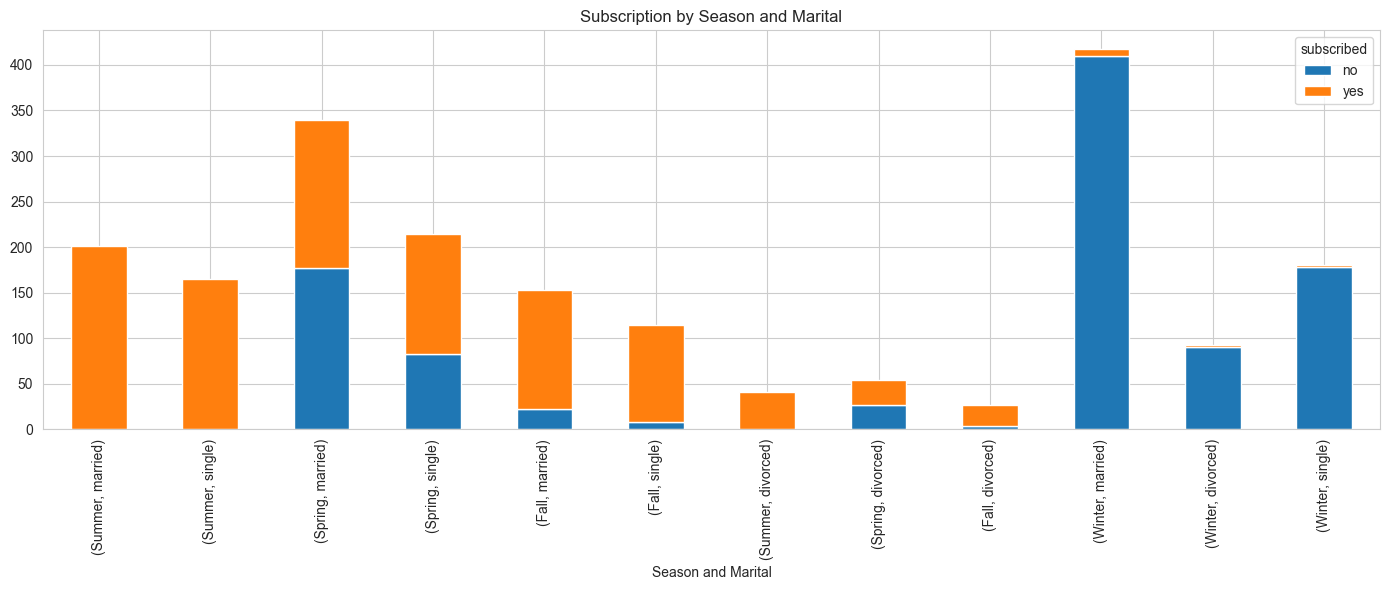

In [422]:
data_df_col = bank_df.groupby(['season', 'marital'])['subscribed'].value_counts().reset_index(name='proportion')
piv = data_df_col.pivot(index=['season', 'marital'], columns='subscribed', values='proportion').sort_values('yes',ascending=False)

piv.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title(f'Subscription by Season and Marital')
plt.xlabel('Season and Marital')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Insights from the Plot:**
The plot above indicates that individuals, especially married and single people, are more likely to subscribe. However, subscription rates tend to decline during winter.

**Potential Causes:**
* **Summer:** The bank may offer special subscriptions tailored for summer vacations and leisure activities, attracting more customers during this period.

* **Fall:** This season aligns with back-to-school preparations, increasing the demand for subscriptions related to education or productivity.

* **Spring:** As the first semester ends and the weather becomes warmer, individuals may feel more optimistic leading to higher subscription rates.

# Data Preprocessing

In [423]:
bank_df2 = pd.read_csv('./data/bank.csv')

### Analyze Column:
- poutcome: After reviewing the definition of the `poutcome` column, we determined that the null values arise because the customers were not contacted by the agent in previous campaigns. These null values are not truly missing but rather indicate a lack of prior contact.

## Missing Values Treatments

In [424]:
bank_df2.isnull().sum().sort_values(ascending=False).reset_index(name='count')

,index,count
0,poutcome,454
1,contact,191
2,education,104
3,age,12
4,job,10
5,default,0
6,balance,0
7,housing,0
8,loan,0
9,day,0


**Note:** We observe that the count of null values in the dataset corresponds to the number of customers who were not contacted before. Therefore, these values are not truly missing but rather indicate that no prior contact was made with these customers.

## Fill Missing Value for poutcome and contact

In [425]:
to_fill_poutcome = {
    'failure': 'failure',
    'success': 'success',
    'other': 'nonexistent',
    np.nan: 'nonexistent'
}

In [426]:
bank_df_fill_first = bank_df2.copy()

In [427]:
bank_df_fill_first['poutcome'] = bank_df_fill_first['poutcome'].map(to_fill_poutcome)

In [428]:
bank_df_fill_first.isnull().sum().sort_values(ascending=False).reset_index(name='count')

,index,count
0,contact,191
1,education,104
2,age,12
3,job,10
4,marital,0
5,default,0
6,balance,0
7,housing,0
8,loan,0
9,day,0


## Fill Null Value Using Mode 

In [429]:
def handle_missing_value(df):
    data = df.copy()
    cols = df.columns.tolist()
    
    for col in cols:
        if type(df[col]) != np.number:
            mode_value = data[col].mode()[0] 
            data[col] = data[col].fillna(mode_value)
        else:
            median = data[col].median()
            data[col] = data[col].fillna(median)
    return data

In [430]:
imputed_bank_df = handle_missing_value(bank_df_fill_first)

In [431]:
imputed_bank_df.isnull().sum().sort_values(ascending=False).reset_index(name='count')

,index,count
0,age,0
1,day,0
2,poutcome,0
3,previous,0
4,pdays,0
5,campaign,0
6,duration,0
7,month,0
8,contact,0
9,job,0


## Check for Duplicates

In [432]:
nb_dup = imputed_bank_df.duplicated().sum()
print(f'Number of duplicated rows: {nb_dup}')

Number of duplicated rows: 0


## Cyclic Transformation for Days

In [433]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

imputed_bank_df['month'] = imputed_bank_df['month'].map(month_mapping)

In [435]:
def cyclic_transform(df, cols):
    data = df.copy()
    for col in cols:
        data[f'Sin_{col}'] = np.sin(2 * np.pi * data[col] / max(data[col])) 
        data[f'Cos_{col}'] = np.cos(2 * np.pi * data[col] / max(data[col]))
    return data

In [436]:
cyclic_bank_df = cyclic_transform(imputed_bank_df, ['day', 'month'])

### Log Transformation

In [437]:
def to_log(df, cols: list):
    data = df.copy()
    
    for col in cols:
        if col in data.columns:
            if data[col].min() <= 0:
                bias = abs(data[col].min()) + 1
                data[col] = np.log(data[col] + bias)
            else:
                data[col] = np.log(data[col])
        else:
            print(f'Column {col} not found in dataframe')
    return data

In [438]:
def to_minute(df, col):
    df[col] = df[col] / 60

In [439]:
col_log = cyclic_bank_df.select_dtypes(include=np.number).columns.tolist()
log_bank_df = to_log(cyclic_bank_df, col_log)

In [440]:
# to_minute(log_bank_df, 'duration')

In [441]:
log_bank_df.describe()

,age,balance,day,month,duration,campaign,pdays,previous,Sin_day,Cos_day,Sin_month,Cos_month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000
mean,3.686872,7.510875,2.292436,1.372344,5.411072,0.465314,4.066048,0.994569,7.352401e-01,7.160807e-01,0.736167,0.586268
std,0.292938,0.651886,0.910493,0.744143,0.774774,0.561701,2.264863,0.718727,3.404040e-01,3.747984e-01,0.369535,0.379783
min,2.890372,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,-1.110223e-16,-1.110223e-16,0.000000,0.000000
25%,3.465736,7.075386,1.609438,0.693147,4.983607,0.000000,4.353483,0.693147,4.727253e-01,4.411380e-01,0.405465,0.125729
50%,3.637586,7.334329,2.484907,1.609438,5.463832,0.000000,5.214936,1.098612,8.725780e-01,8.510798e-01,0.916291,0.693147
75%,3.912023,7.873027,3.135494,1.945910,5.937536,0.693147,5.533389,1.386294,1.046393e+00,1.035187e+00,1.052926,0.916291
max,4.532599,11.316728,3.433987,2.484907,7.508239,2.397895,6.752270,4.025352,1.097756e+00,1.096901e+00,1.098612,1.098612


## Detecting Outliers

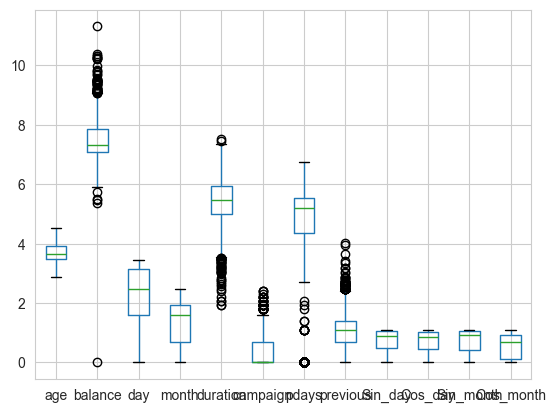

In [442]:
log_bank_df.boxplot()
plt.show()

In [443]:
def outliers_removing_iqr(df):
    data = df.copy()
    cols = data.select_dtypes(include=np.number).drop(['day','age'], axis=1).columns.tolist()

    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        
        f1 = q1 - 1.5 * iqr
        f2 = q3 + 1.5 * iqr
        
        data = data[(data[col] >= f1) & (data[col] <= f2)]
    return data

In [444]:
len_before = bank_df2.shape[0]

bank_df_without_outliers = outliers_removing_iqr(log_bank_df)

len_after = bank_df_without_outliers.shape[0]
print(f'{len_before - len_after} rows removed')

589 rows removed


In [445]:
bank_df_without_outliers.describe()

,age,balance,day,month,duration,campaign,pdays,previous,Sin_day,Cos_day,Sin_month,Cos_month
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03,1.411000e+03,1411.000000,1411.000000
mean,3.704183,7.474100,2.282881,1.262575,5.404380,0.424675,5.293406,1.258865,7.074030e-01,7.535256e-01,0.742303,0.673313
std,0.283467,0.536640,0.975994,0.807145,0.690284,0.502185,0.481389,0.505522,3.288939e-01,3.830339e-01,0.373257,0.364799
min,2.944439,6.049733,0.000000,0.000000,3.583519,0.000000,2.708050,0.693147,-1.110223e-16,-1.110223e-16,0.000000,0.000000
25%,3.496508,7.081288,1.386294,0.693147,4.955827,0.000000,5.192957,0.693147,4.727253e-01,4.411380e-01,0.405465,0.405465
50%,3.663562,7.331715,2.564949,1.386294,5.429346,0.000000,5.303305,1.098612,8.725780e-01,9.872472e-01,0.916291,0.916291
75%,3.931826,7.832410,3.258097,1.945910,5.881928,0.693147,5.572154,1.609438,1.001921e+00,1.069467e+00,1.052926,0.916291
max,4.532599,9.050993,3.433987,2.484907,7.294377,1.609438,6.752270,2.890372,1.097756e+00,1.096901e+00,1.098612,1.098612


### Violin Plot

In [446]:
def plot_multiple_violin(data):
    # Select only numeric columns
    numeric_columns = data.select_dtypes(include=np.number).columns

    plt.figure(figsize=(12, 8))
    sns.violinplot(data=data[numeric_columns])
    plt.title('Violin Plot')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

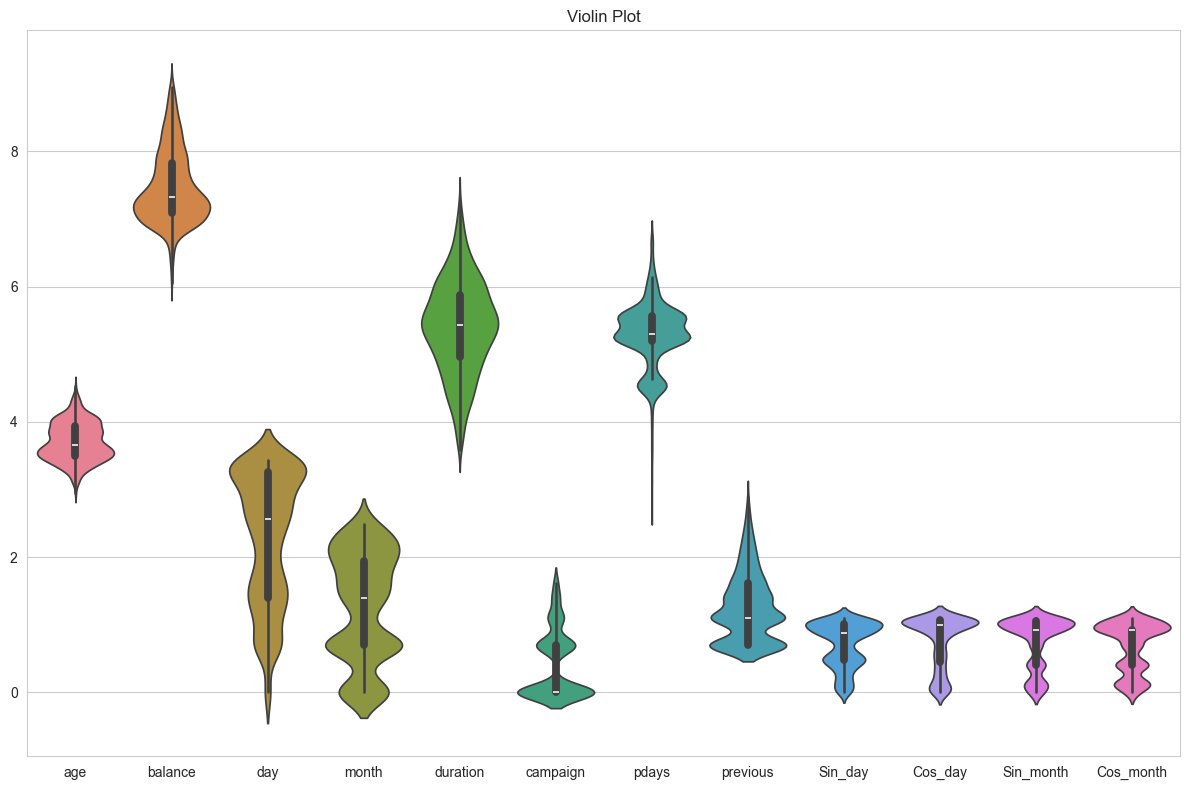

In [447]:
plot_multiple_violin(bank_df_without_outliers)

## Data Scaling

In [468]:
X = bank_df_without_outliers.drop(['subscribed', 'day', 'month', 'duration'], axis=1)
y = bank_df_without_outliers['subscribed']

In [469]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

to_robust_col = ['balance', 'campaign', 'pdays', 'previous']
to_standard_col = ['age']
to_target_encoding = ['job']
to_one_hot = X.select_dtypes('object').drop(['job'], axis=1).columns.tolist()

In [480]:
transformer = ColumnTransformer([
    ('robust', RobustScaler(), to_robust_col),  
    ('standard', StandardScaler(), to_standard_col),
    ('target', TargetEncoder(cv=10), to_target_encoding),  
    ('onehot', OneHotEncoder(drop='first', sparse_output=False), to_one_hot)  
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform="pandas")

X_transformed = transformer.fit_transform(X, y)

In [482]:
X_transformed.head()

,balance,campaign,pdays,previous,age,job,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,Sin_day,Cos_day,Sin_month,Cos_month
0,-0.142402,1.0,-1.089027,0.000000,-0.841480,0.338276,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.788464,1.090042,1.052926,0.405465
1,0.117511,1.0,-1.049665,-0.442507,-0.143353,0.339869,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.788464,1.090042,1.052926,0.405465
2,0.368989,1.0,0.478622,-0.442507,1.317569,0.811636,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.788464,1.090042,1.052926,0.405465
3,-0.136597,0.0,0.467656,0.000000,0.515110,0.258719,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.788464,1.090042,1.052926,0.405465
4,0.348358,0.0,1.134071,-0.442507,1.005064,0.801910,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.788464,1.090042,1.052926,0.405465


# Classification

In [483]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=42, oob_score=True)

In [484]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1128, 1128, 283, 283)

In [485]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=42, oob_score=True)

In [486]:
rf.oob_score_

0.975177304964539

In [487]:
rf.score(X_test,y_test)

0.9752650176678446

## Confusion Matrix

In [488]:
y_pred = rf.predict(X_test)

In [489]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

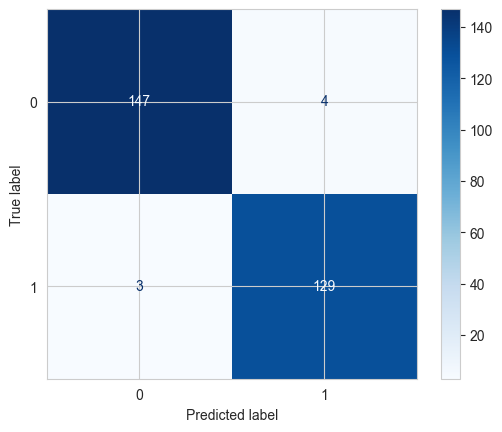

In [491]:
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

## Accuracy, precision, Recall and F1 Score

In [493]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, pos_label='yes')
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred, pos_label='yes')
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='yes')
print("F1-Score:", f1)

Accuracy: 0.9752650176678446
Precision: 0.9699248120300752
Recall (Sensitivity): 0.9772727272727273
F1-Score: 0.9735849056603774
